---
# **GOAL:** To Identify **Customer Segments** For Online Retail With The Use Of **K-Means Clustering**.
---

## **CONTENTS:**
> 1. **IMPORTING LIBRARIES**
> 2. **LOADING THE DATASET**
> 3. **DATA CLEANING**
> 4. **DATATYPE CONVERSION**
> 5. **FEATURE ENGINEERING**
> 6. **EDA (EXPLORATORY DATA ANALYSIS)**
> 7. **FEATURE SELECTION**
> 8. **MODEL CREATION**
> 9. **MODEL QUALITY CHECK**
> 10. **CLUSTER INTERPRETATION**
> 11. **SUMMARY**
> 12. **RECOMMENDATIONS**

---
## 1. IMPORTING LIBRARIES
---

In [236]:
# import base libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import other libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

---
## 2. LOADING THE DATASET
---

In [238]:
# laod the dataset
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [239]:
# look at the complete dataset
print(f"Shape of data: {df.shape}\n")

# info
df.info()

Shape of data: (541909, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**CONCLUSION:**
* There are 541909 rows and 8 columns before cleaning.
* 'InvoiceNo' consists of invoice ID of the transaction.
* 'StockCode' consists of stock ID.
* 'Description' consists of details about the stock being bought.
* 'Quantity' consists of the quantity bought.
* 'InvoiceDate' is the date and time of the invoice generation.
* 'UnitPrice' is the unit price of the product being bought.
* 'CustomerID' is the unique ID allotted to the customer.
* 'Country' specifies the country of the customer.

In [241]:
# description
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## 3. DATA CLEANING
---

In [243]:
# check duplicate rows
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [244]:
# duplicate rows percentage
print(f"Percentage of duplicate rows:{(5268/len(df)) * 100}")

# NOTE: about 1%.

Percentage of duplicate rows:0.9721189350979592


In [245]:
# drop duplicates
df.drop_duplicates(inplace=True)

print("Info after dropping the duplicate rows:\n")
df.info()

Info after dropping the duplicate rows:

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


**CONCLUSION:**
* After dropping the duplicate rows, 536641 total rows remain.

In [247]:
# look at null values
print("The null values are:")
print(df.isna().sum(), "\n")

# look at null value percentage
print("The null value percentages are:")
df.isna().mean() * 100

The null values are:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64 

The null value percentages are:


InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

**CONCLUSION:**
* 'Description' and 'CustomerID' have null values.
* For 'Description' column, as null values are <1%, we will drop those rows.

In [249]:
# drop null value rows of 'Description' column
df = df.dropna(subset='Description')
print(df.info())

# look at the null values again
print("\nNull values after cleaning 'Description' column:")
print(df.isna().sum())

# look at the null value percentages again
print("\nNow the null value percentages are:")
df.isna().mean() * 100

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.7+ MB
None

Null values after cleaning 'Description' column:
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133583
Country             0
dtype: int64

Now the null value percentages are:


InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.960061
Country         0.000000
dtype: float64

**CONCLUSION:**
* Total rows now: 535187.
* Only 'CustomerID' column left to clean next.

In [251]:
# check all the unique elements in each column
for column in df.columns:
    print("*" * 30)
    print(f"The unique values in '{column}' is:")
    print(df[column].unique())
    print(f"The count of unique values in '{column}' is:")
    print(df[column].nunique())
    print("*" * 30, "\n")

******************************
The unique values in 'InvoiceNo' is:
[536365 536366 536367 ... 581585 581586 581587]
The count of unique values in 'InvoiceNo' is:
24446
****************************** 

******************************
The unique values in 'StockCode' is:
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
The count of unique values in 'StockCode' is:
3958
****************************** 

******************************
The unique values in 'Description' is:
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
The count of unique values in 'Description' is:
4223
****************************** 

******************************
The unique values in 'Quantity' is:
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    2

**CONCLUSION:**
* There are thousands of unique values in each columns except 'Country', so we **can't** look at it manually.
* Also, 'Quantity' has negative values which needs to be further investigated.

In [253]:
# check unique products with negative quantities
negative_quantity_df = df[df['Quantity'] < 0]
negative_product_group = negative_quantity_df.groupby('Description')['Quantity'].sum()
print(negative_product_group, "\n")

# check the invoices of the associated quantity
negative_quantity_df = df[df['Quantity'] < 0]
negative_quantity_invoice_group = negative_quantity_df.groupby('InvoiceNo')['Quantity'].sum()
print(negative_quantity_invoice_group, "\n")

# seperating the invoices
# separate positive and negative quantities
normal_invoices = df[df['Quantity'] > 0]
return_invoices = df[df['Quantity'] < 0]

# display first few rows of normal and return invoices
print("*" * 100)
print("Normal Invoices:")
print(f"Total normal invoices: {len(normal_invoices)}")
print(normal_invoices[["InvoiceNo", "Description", "Quantity"]].head(), "\n")

print("*" * 100)
print("Return/Cancelled Invoices:")
print(f"Total return/cancel invoices: {len(return_invoices)}")
print(return_invoices[["InvoiceNo", "Description", "Quantity"]].head())

Description
20713                               -400
 50'S CHRISTMAS GIFT BAG LARGE        -2
 DOLLY GIRL BEAKER                    -7
 OVAL WALL MIRROR DIAMANTE            -5
 SET 2 TEA TOWELS I LOVE LONDON       -8
                                    ... 
wrongly coded-23343                 -800
wrongly marked carton 22804         -256
wrongly marked. 23343 in box       -3100
wrongly sold as sets                -600
wrongly sold sets                   -975
Name: Quantity, Length: 2110, dtype: int64 

InvoiceNo
537032       -30
537425       -20
537426       -35
537432       -43
538072       -13
           ...  
C581484   -80995
C581490      -23
C581499       -1
C581568       -5
C581569       -6
Name: Quantity, Length: 4310, dtype: int64 

****************************************************************************************************
Normal Invoices:
Total normal invoices: 525462
  InvoiceNo                          Description  Quantity
0    536365   WHITE HANGING HEART T-LIGHT H

In [254]:
# ratio of cancelled invoice vs normal invoice
(9725/525462)

0.01850752290365431

**CONCLUSION:**
* The normal invoices (525462) have integer values while the cancelled/returned invoice starts with 'C' (9725) . As it is very small in quantity (about ratio of 0.018), we will drop it.

In [256]:
# drop the negative quantity
df = df[df["Quantity"]>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525462 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    525462 non-null  object        
 1   StockCode    525462 non-null  object        
 2   Description  525462 non-null  object        
 3   Quantity     525462 non-null  int64         
 4   InvoiceDate  525462 non-null  datetime64[ns]
 5   UnitPrice    525462 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      525462 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.1+ MB


In [257]:
# look at the negative quantities again
df[df["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**CONCLUSION:**
* Dropped negative quantities.

In [259]:
# drop the null values of 'CustomerID'
df = df.dropna(subset="CustomerID")

# look at the null values again
print(f"Checking for any null values: {df.isna().sum()}\n")

# shape of data
print(f"Now, shape of dataset: {df.shape}")

Checking for any null values: InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now, shape of dataset: (392732, 8)


**CONCLUSION:**
* The 'CustomerID' column needs to be non-null for Customer Segmentation, so we will drop the null rows here which will reduce our data to about 75%(400000) which is still substantial. This will ensure that K means clustering analysis of the customers find valuable data in 'CustomerID'. This column is the key in tracking customer for customer segmentation.
* Finally, data is cleaned and we can move to standardisation and other preprocessing.

---
## 4. DATATYPE CONVERSION
---

In [262]:
# changing datatype of 'CustomerID' to relevant int64 type
df["CustomerID"] = df["CustomerID"].astype('int64')

# look at info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [263]:
# changing datatype of 'InvoiceNo'
df["InvoiceNo"] = df["InvoiceNo"].astype('int64')

# look at info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  int64         
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.0+ MB


In [264]:
# look at 0 unit price
print(len(df[df["UnitPrice"]==0]))
df[df["UnitPrice"]==0]


40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom


In [265]:
# drop the rows with 'UnitPrice'=0
df = df[df["UnitPrice"]>0]

# check again
df.sort_values(by="UnitPrice")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom
286813,562044,16045,POPART WOODEN PENCILS ASST,100,2011-08-02 10:24:00,0.040,16607,United Kingdom
...,...,...,...,...,...,...,...,...
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.950,15502,United Kingdom
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.320,12744,Singapore
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.060,12536,France
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.060,12536,France


**CONCLUSION:**
* As the 0 unit price doesn't make much sense, and more than that, it is just 40 rows, so we dropped them.

In [267]:
# look at the dataset again
print(df.info(), "\n")

# look at the null values
print("Final check of null values:")
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  int64         
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.0+ MB
None 

Final check of null values:


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

---
## 5. FEATURE ENGINEERING
---

**NOTE:** We can do RFM (Recency, Frequency and Monetary) analysis for which we need to create new features. It gives organizations a sense of how much revenue comes from repeat customers (vs. new customers), and which levers they can pull to try to make customers happier so they become repeat purchasers.( source: Investopedia)

**RECENCY**
* We have derived the 'Recency' column from the 'InvoiceDate' column. Recency speaks of no. of days ago the transaction was made compared to the latest invoice.

In [271]:
# create recency
latest_date = df["InvoiceDate"].max()
df["Recency"] = (latest_date - df["InvoiceDate"]).dt.days
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373


**TOTAL PRICE**
* 'TotalPrice' column is the total price spent by each row and is calculated by multiplying unit price with total quantity bought.

In [273]:
# create monetary (total money spent)
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34


**FREQUENCY**
* 'Frequency' column is the count of invoices generated by each customer. It tells us how many transactions done by the customer, or the frequency of the customer till the latest invoice date.

In [275]:
# create frequency
frequency_df = df.groupby("CustomerID")["InvoiceNo"].nunique()
print("The count of invoice of each customer is:")
print(frequency_df)

# merging the frequency_df
df = pd.merge(df, frequency_df, on="CustomerID", how="left")

df.head()

The count of invoice of each customer is:
CustomerID
12346     1
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     2
18283    16
18287     3
Name: InvoiceNo, Length: 4338, dtype: int64


,InvoiceNo_x,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TotalPrice,InvoiceNo_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373,15.30,34
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373,22.00,34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34


In [276]:
# renaming the columns
df.rename({"InvoiceNo_x": "InvoiceNo", "InvoiceNo_y": "Frequency"}, inplace=True, axis=1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TotalPrice,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373,15.30,34
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373,22.00,34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34


**AVERAGE ORDER VALUE**
* 'AverageOrderValue' column stores the order value or the average amount spent by each customer in each order. It is calculated by dividing the total amount spent by the customer (total price) divided by the total number of times they did the transactions (frequency).

In [278]:
# create average order value column
df["AverageOrderValue"] = df["TotalPrice"] / df["Frequency"]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TotalPrice,Frequency,AverageOrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373,15.30,34,0.450000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0.598235
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373,22.00,34,0.647059
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0.598235
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0.598235


In [279]:
# look at summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          392692 non-null  int64         
 1   StockCode          392692 non-null  object        
 2   Description        392692 non-null  object        
 3   Quantity           392692 non-null  int64         
 4   InvoiceDate        392692 non-null  datetime64[ns]
 5   UnitPrice          392692 non-null  float64       
 6   CustomerID         392692 non-null  int64         
 7   Country            392692 non-null  object        
 8   Recency            392692 non-null  int64         
 9   TotalPrice         392692 non-null  float64       
 10  Frequency          392692 non-null  int64         
 11  AverageOrderValue  392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 36.0+ MB


---
## 6. EDA (EXPLORATORY DATA ANALYSIS)
---

**CORRELATION MATRIX**

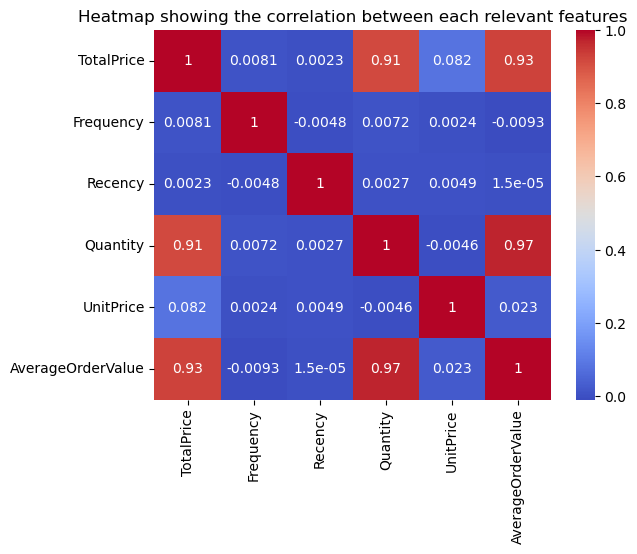

Correlation Matrix:


,TotalPrice,Frequency,Recency,Quantity,UnitPrice,AverageOrderValue
TotalPrice,1.000000,0.008085,0.002289,0.914451,0.081619,0.928401
Frequency,0.008085,1.000000,-0.004772,0.007207,0.002375,-0.009317
Recency,0.002289,-0.004772,1.000000,0.002697,0.004947,0.000015
Quantity,0.914451,0.007207,0.002697,1.000000,-0.004578,0.969389
UnitPrice,0.081619,0.002375,0.004947,-0.004578,1.000000,0.023087
AverageOrderValue,0.928401,-0.009317,0.000015,0.969389,0.023087,1.000000


In [282]:
# check the correlation matrix of the relevant features
features = ["TotalPrice", "Frequency", "Recency", "Quantity", "UnitPrice", "AverageOrderValue"]

# create correlation matrix
corr_matrix = df[features].corr()

# heatmap of the correlation matrix
plt.title("Heatmap showing the correlation between each relevant features")
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.show()

print("Correlation Matrix:")
corr_matrix

**CONCLUSION:**
* 'Quantity' and 'AverageOrderValue are highly correlated (0.97) , so we will drop 'Quantity' as 'AverageOrderValues' gives more insight on the customer purchase behaviour.

**BOXPLOT AND KDEPLOT**

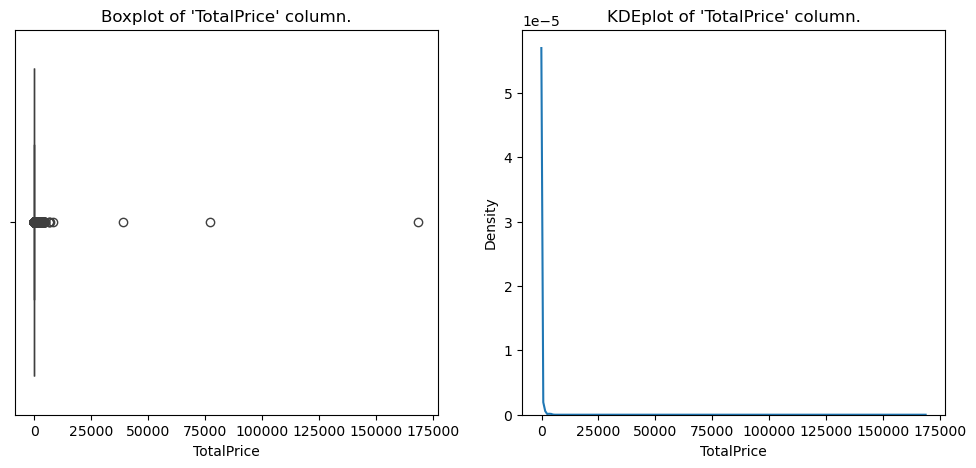

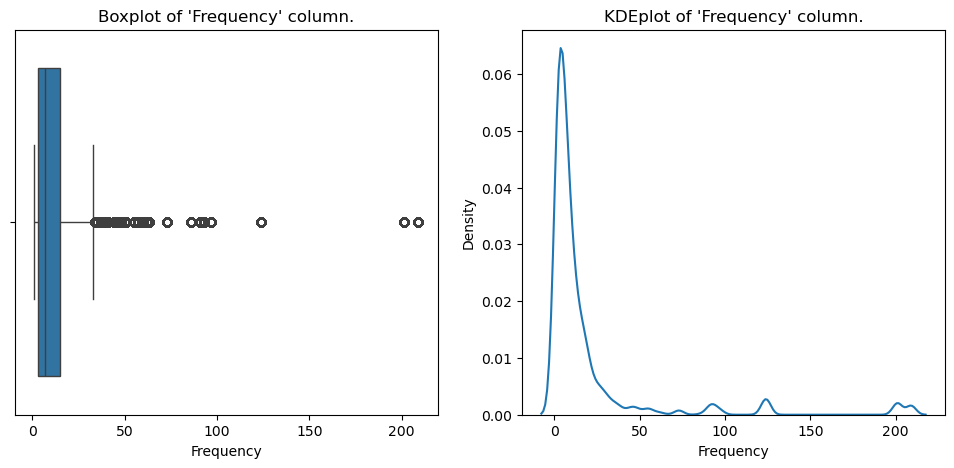

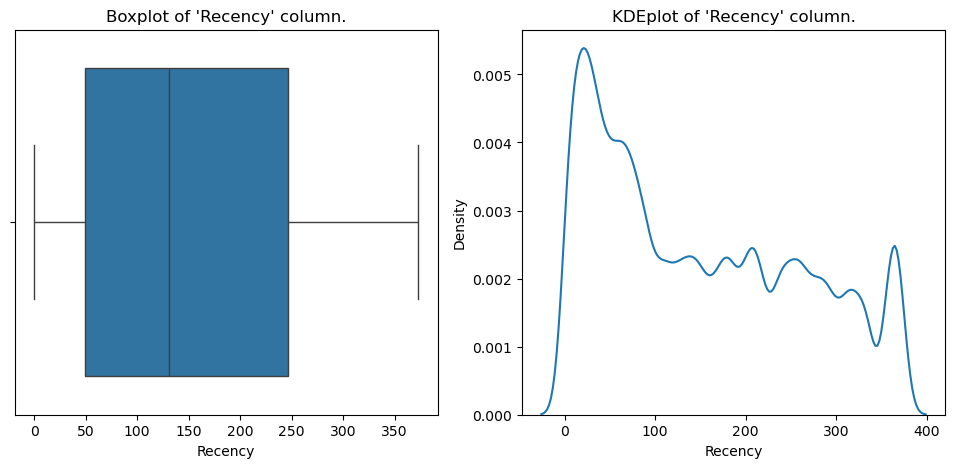

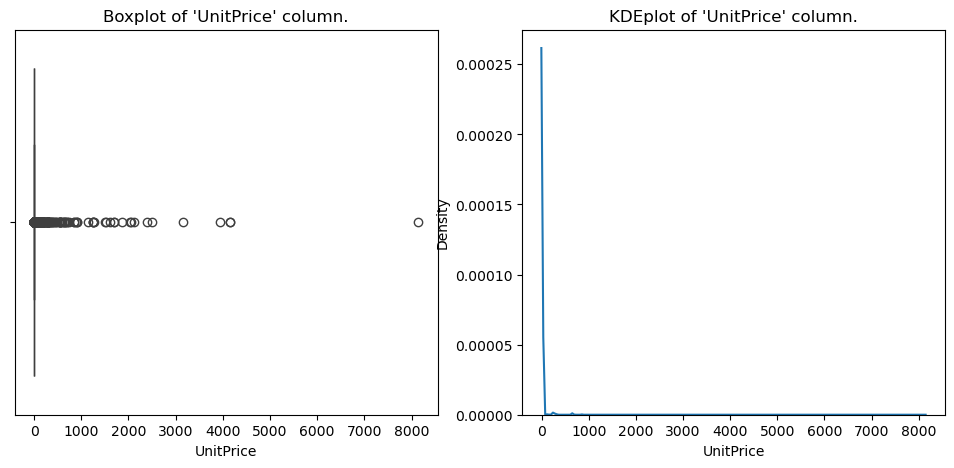

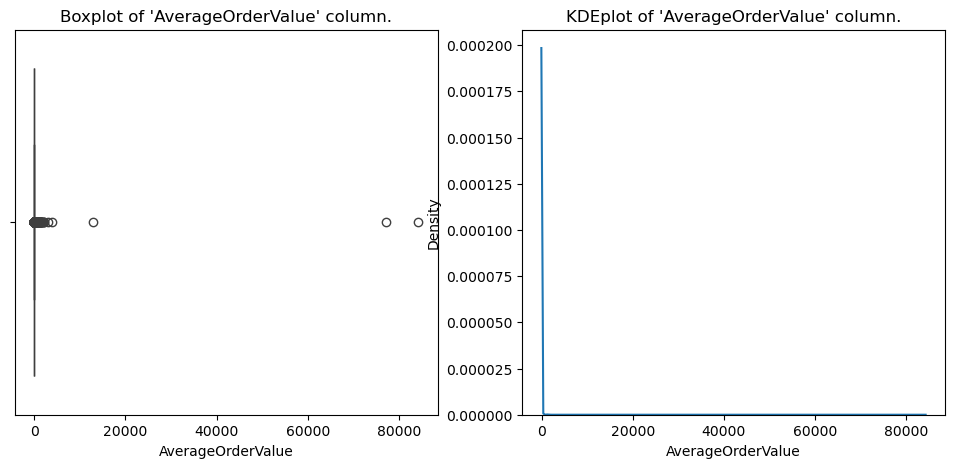

In [285]:
# univariate analysis
features_new = ["TotalPrice", "Frequency", "Recency", "UnitPrice", "AverageOrderValue"]
for column in df[features_new].columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.boxplot(data=df[features_new], x=column, ax=ax[0])
    ax[0].set_title(f"Boxplot of '{column}' column.")
    
    sns.kdeplot(data=df[features], x=column, ax=ax[1])
    ax[1].set_title(f"KDEplot of '{column}' column.")
    plt.show()

## ***IMPORTANT NOTE:***
#### *We can see above that there are outliers, but on generating the model by removing the outlier the model performed very poorly (clusters were overlapping [Davies-Bouldin Index was extremely high]). The reason being there are bulk buyers that are creating the skew but they are important customers and cannot be ignored.* 
**SO WE WILL KEEP THE OUTLIERS.**

---
## 7. FEATURE SELECTION
---

**SCALING THE FEATURES USING STANDARDSCALER**

In [289]:
# using the new features (features_new) defined above

# initialise scaler
scaler = StandardScaler()

# fit and transform
scaled = scaler.fit_transform(df[features_new])

# convert back to dataframe
scaled_df = pd.DataFrame(scaled, columns=df[features_new].columns)

scaled_df

,TotalPrice,Frequency,Recency,UnitPrice,AverageOrderValue
0,-0.023566,0.407949,1.968167,-0.025893,-0.022590
1,-0.007366,0.407949,1.968167,0.011873,-0.021786
2,-0.002030,0.407949,1.968167,-0.016901,-0.021521
3,-0.007366,0.407949,1.968167,0.011873,-0.021786
4,-0.007366,0.407949,1.968167,0.011873,-0.021786
...,...,...,...,...,...
392687,-0.039960,-0.396488,-1.341756,-0.102326,-0.011196
392688,-0.032245,-0.396488,-1.341756,-0.046125,-0.007941
392689,-0.019388,-0.396488,-1.341756,0.046043,-0.002516
392690,-0.019388,-0.396488,-1.341756,0.046043,-0.002516


**CONCLUSION:**
* All the columns look good and ready for next step.

---
## 8. MODEL CREATION
---

**FINDING OPTIMAL k USING ELBOW METHOD**

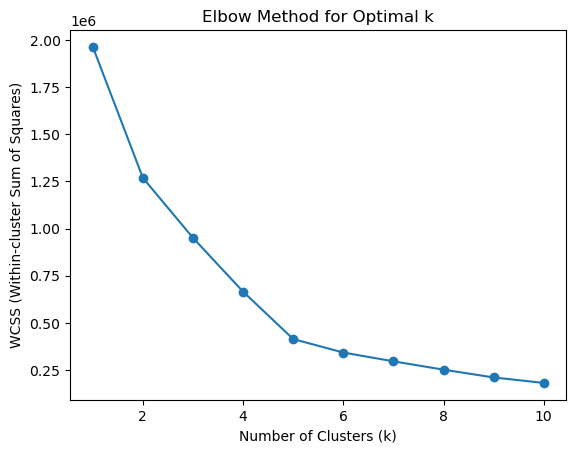

In [293]:
# determine the optimal cluster using elbow method
# initialize a list to store the within-cluster sum of squares (WCSS)
wcss = []

# try different numbers of clusters (k = 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=17)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to centroids

# plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

**CONCLUSION:**
* We can see from the graph that the elbow is at 5.

**FITTING THE MODEL WITH SCALED DATASET**

In [296]:
# from the graph above optimal k is 5
optimal_k = 5

# apply K-means clustering with optimal k (k = 5)
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=17)
kmeans.fit(scaled_df)

# Get the cluster labels
labels = kmeans.labels_


**ASSIGNING CLUSTER COLUMN TO THE ORIGINAL DATASET**

In [298]:
# assigning cluster labels to the oridinal df
df['Cluster'] = labels
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TotalPrice,Frequency,AverageOrderValue,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373,15.30,34,0.450000,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0.598235,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373,22.00,34,0.647059,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0.598235,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0.598235,1


---
## 9. MODEL QUALITY CHECK
---

**VISUALIZING USING 2D PCA (Principal Component Analysis) PLOT**

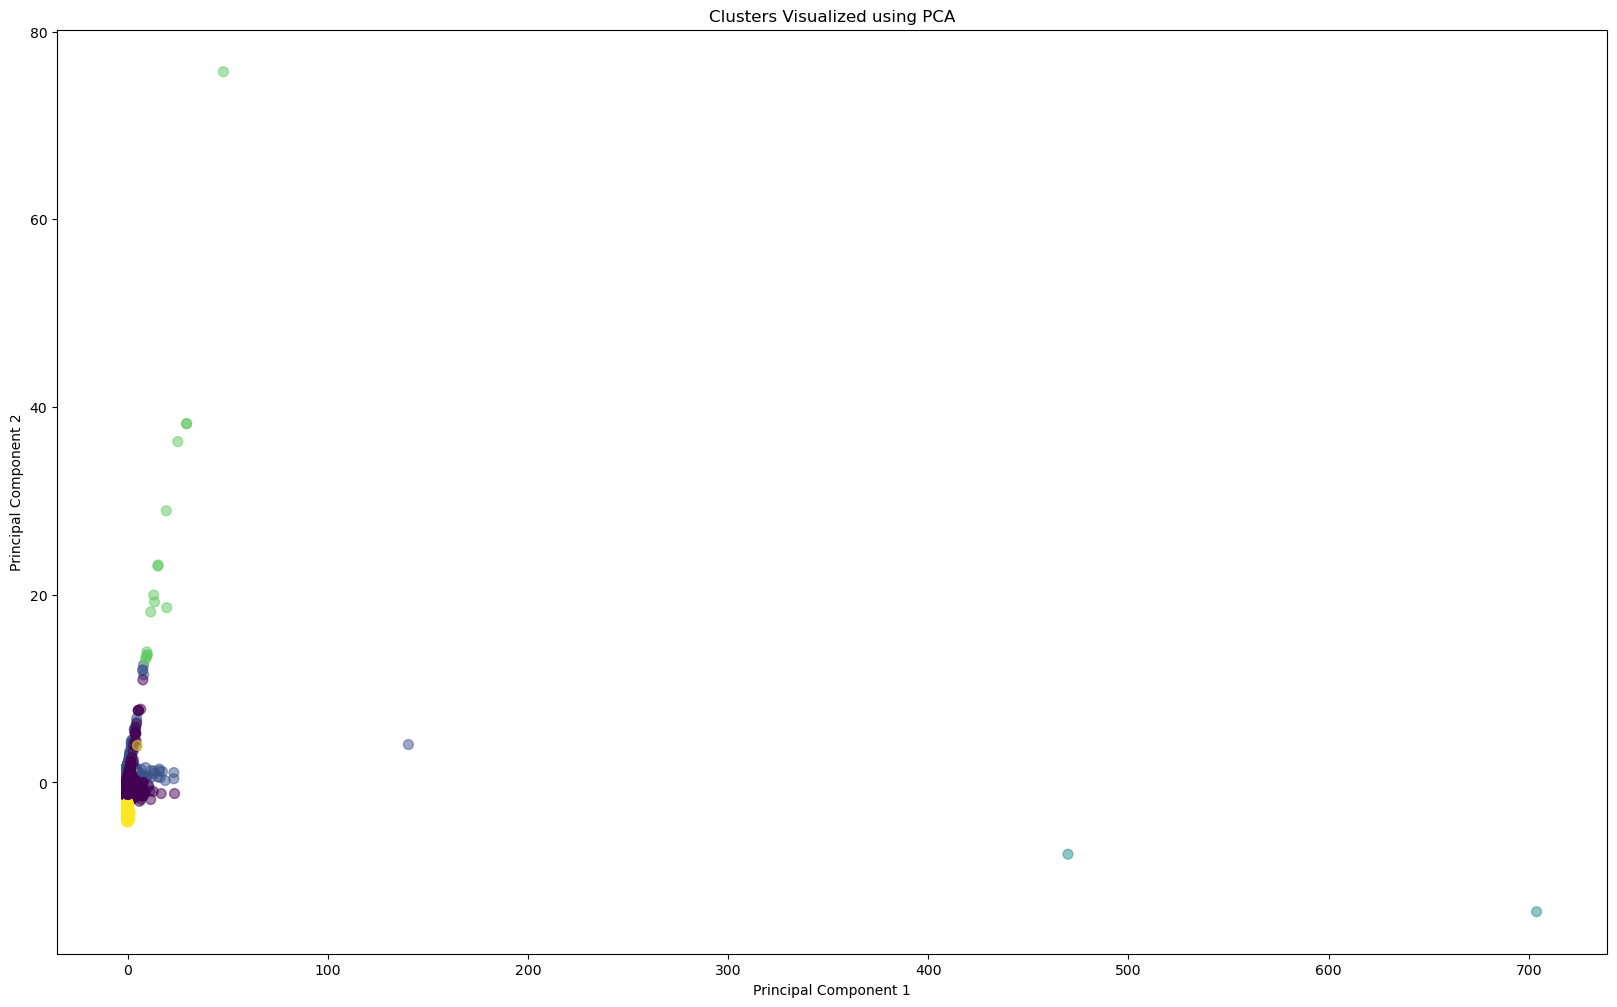

In [301]:

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)

# Plot the clusters
plt.figure(figsize=(20, 12))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', s=50, alpha=0.5)
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**CONCLUSION:**
* The clusters visually looks seperated.

**VISUALIZING USING 3D PCA PLOT**

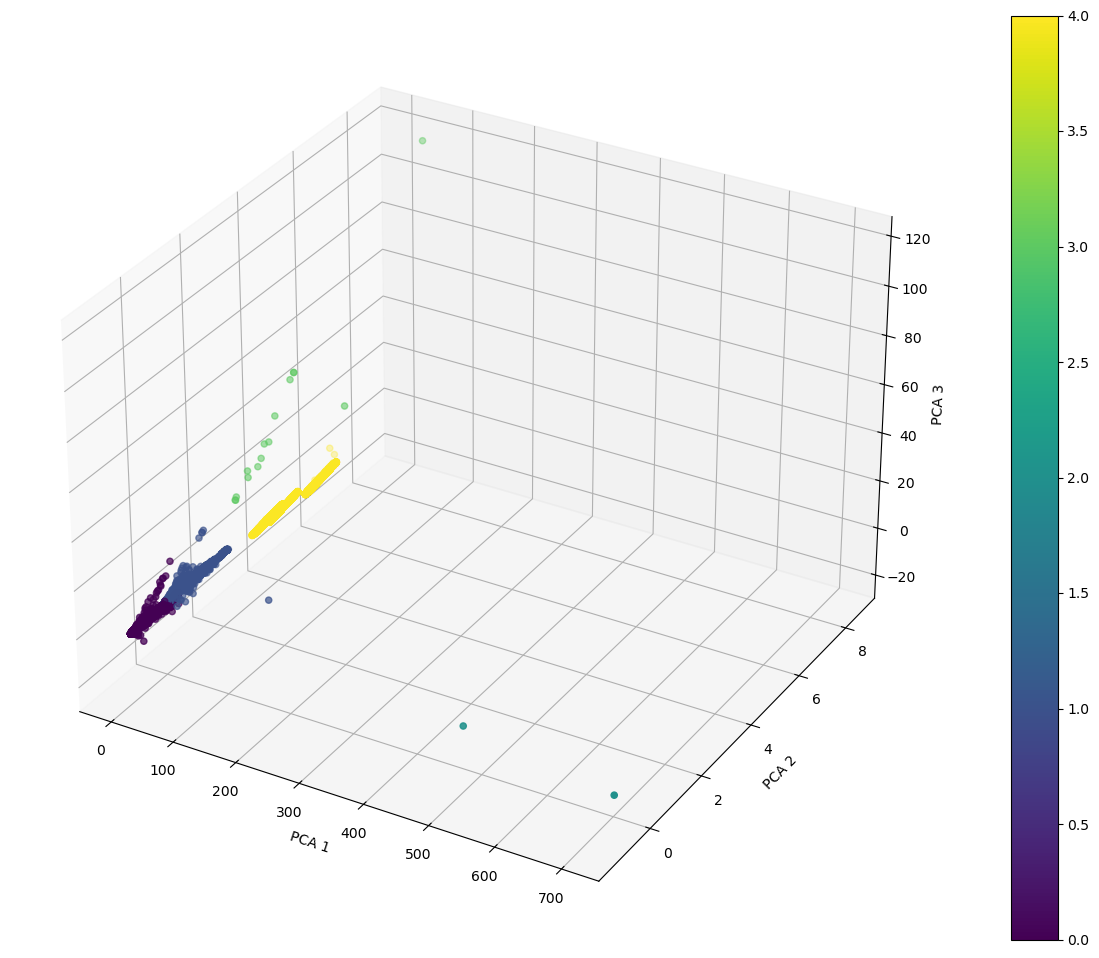

In [304]:
# create the copy of scaled_df for visual
pca_df = scaled_df.copy()

# assign cluster column
pca_df['Cluster'] = labels

# create a 3d plot
pca = PCA(n_components=3)
X_pca = pca.fit_transform(pca_df)

# Step 3: add the PCA components to dataframe
pca_df['PCA1'] = X_pca[:, 0]
pca_df['PCA2'] = X_pca[:, 1]
pca_df['PCA3'] = X_pca[:, 2]

# Step 4: Plot the 3D scatter plot of the PCA components with the cluster labels
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with colors based on the cluster labels
scatter = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=pca_df['Cluster'], cmap='viridis')

# Labeling the axes
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Add a color bar to indicate the cluster labels
fig.colorbar(scatter, ax=ax)

plt.show()

**CONCLUSION:**
* The 3D PCA plot gives clearer picture of the seperation.

**CALCULATING DAVIES-BOULDIN INDEX**
* **Davies-Bouldin Index** tells the quality of the clustering. It is best when it is in range of 0 to 1 (as in our case). Generally, lower Davies-Bouldin Index means well seperated and compact clusters. 

In [306]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(scaled_df, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')  # Lower is better

Davies-Bouldin Index: 0.5138607001724111


**CONCLUSION:**
* As Davies-Bouldin Index is lower than 1, it seems to be an good model.

---
## 10. CLUSTER INTERPRETATION
---

**GETTING SUMMARY STATISTICS**

In [310]:
numerical_columns = ['Quantity', 'UnitPrice', 'Recency', 'TotalPrice', 'Frequency', 'AverageOrderValue', 'Cluster']

# Grouping by 'Cluster' and calculating mean, median, and std for numerical columns
cluster_summary = df[numerical_columns].groupby('Cluster')[numerical_columns].agg(['mean', 'median', 'std'])

# Display the summary statistics
cluster_summary

Quantity                          UnitPrice            \
                 mean   median          std         mean    median   
Cluster                                                              
0           12.736214      6.0    41.304175     2.875671     1.690   
1           13.350148      6.0    47.680796     3.207268     1.950   
2        77605.000000  77605.0  4794.183976     1.560000     1.560   
3            1.000000      1.0     0.000000  2782.909375  2085.905   
4            8.455505      2.0    19.778209     2.934793     1.650   

                         Recency                        TotalPrice  ...  \
                 std        mean median         std           mean  ...   
Cluster                                                             ...   
0           7.408562   66.054694   59.0   46.287729      21.660484  ...   
1           9.435574  267.171539  263.0   61.852279      23.370755  ...   
2           0.735391  162.500000  162.5  229.809704  122826.600000  ...   
3        1706.158796  124.875000   75.0  104.972933    2782.909375  ...   
4           7.414810  136.191996  116.0  106.829380      14.116980  ...   

                        Frequency                   AverageOrderValue  \
                  std        mean median        std              mean   
Cluster                                                                 
0           71.005095    9.428005    6.0  10.562167          4.480421   
1          123.957651   11.523238    7.0  13.764069          4.399872   
2        64548.949627    1.500000    1.5   0.707107      80709.200000   
3         1706.158796   36.625000   11.0  65.728609        460.499116   
4           27.982240  150.574173  124.0  47.914457          0.104458   

                                   Cluster              
               median          std    mean median  std  
Cluster                                                 
0            1.764706    15.571067     0.0    0.0  0.0  
1            1.680000    38.054179     1.0    1.0  0.0  
2        80709.200000  4985.951336     2.0    2.0  0.0  
3          227.651763   599.033189     3.0    3.0  0.0  
4            0.045161     0.236734     4.0    4.0  0.0  

[5 rows x 21 columns]

**CREATING BASIC CLUSTER SUMMARY USING MEDIAN FOR INTERPRETATION**

In [312]:
basic_cluster_summary = df[numerical_columns].groupby('Cluster')[numerical_columns].median()
basic_cluster_summary

,Quantity,UnitPrice,Recency,TotalPrice,Frequency,AverageOrderValue,Cluster
Cluster,,,,,,,
0,6.0,1.690,59.0,11.800,6.0,1.764706,0.0
1,6.0,1.950,263.0,13.200,7.0,1.680000,1.0
2,77605.0,1.560,162.5,122826.600,1.5,80709.200000,2.0
3,1.0,2085.905,75.0,2085.905,11.0,227.651763,3.0
4,2.0,1.650,116.0,5.900,124.0,0.045161,4.0


**CONCLUSION:**
After feature engineering and clustering analysis, the final customer segmentation resulted in five distinct clusters:

* **Cluster 0: New Buyers**
These customers have made a few recent purchases, spending very small amounts per transaction.
They show moderate recency (59 days ago) and low overall spending, indicating they are newly acquired or casual buyers still exploring the offerings.

* **Cluster 1: Lapsed Low Buyers**
Customers in this segment made low-value purchases in the past but have not engaged for a long time (263 days).
Their limited historical spend and inactivity suggest they are unlikely to contribute significantly without reactivation efforts.

* **Cluster 2: Wholesale / Bulk Buyers**
Characterized by extremely large order quantities and exceptionally high total spending.
Their low purchase frequency (around 1-2 times) indicates bulk buying behavior typical of wholesale clients or B2B resellers.

* **Cluster 3: Luxury Buyers**
This segment consists of customers purchasing high-priced products with decent purchase frequency and relatively recent activity.
They represent high-value, premium customers likely sensitive to quality and brand positioning rather than price discounts.

* **Cluster 4: Micro Frequent Buyers**
These customers engage frequently (over 120 transactions) but with extremely low monetary value per order.
They indicate a behavior of small, repetitive purchases — potentially lower-margin customers but important for volume-driven models.


**ASSIGNING CLUSTER LABEL TO THE *ORIGINAL* DATASET**

In [315]:
# grouping the clusters and countries

# convert the 'Cluster column to proper name
def label_func(column):
    if column==0:
        return "New Buyers"
    elif column==1:
        return "Lapsed Low Buyers"
    elif column==2:
        return "Wholesale / Bulk Buyers"
    elif column==3:
        return "Luxury Buyers"
    elif column==4:
        return "Micro Frequent Buyers"

df["ClusterLabel"] = df["Cluster"].apply(label_func)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TotalPrice,Frequency,AverageOrderValue,Cluster,ClusterLabel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373,15.30,34,0.450000,1,Lapsed Low Buyers
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0.598235,1,Lapsed Low Buyers
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373,22.00,34,0.647059,1,Lapsed Low Buyers
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0.598235,1,Lapsed Low Buyers
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0.598235,1,Lapsed Low Buyers


**INTERPRETING CLUSTERS BASED ON EACH COUNTRY**

In [317]:
import random

cluster_label_df = df.copy()

# checking details for different countries
country_list = df["Country"].unique()

random_country = random.choice(country_list)

print(f"For {random_country}:")
cluster_label_df[cluster_label_df["Country"]==random_country].groupby("Cluster")["ClusterLabel"].value_counts().reset_index()


For Belgium:


,Cluster,ClusterLabel,count
0,0,New Buyers,1117
1,1,Lapsed Low Buyers,914


In [318]:
# Statistical summary based on country
grouped_by_country = df.groupby('Country').agg({
    'Quantity': 'sum',   # Sum of 'Quantity' for each country
    'UnitPrice': 'mean', # Average 'UnitPrice' for each country
    'Recency': 'mean',   # Average 'Recency' for each country
    'TotalPrice': 'sum', # Sum of 'TotalPrice' for each country
    'Frequency': 'mean',  # Average 'Frequency' for each country
    'AverageOrderValue': 'mean' # AverageOrderValue for each country
})

# To reset the index and get a clean DataFrame
grouped_by_country.reset_index(inplace=True)

# Display the grouped DataFrame
grouped_by_country

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency,AverageOrderValue
0,Australia,83891,3.053133,185.091448,138453.810,15.963590,7.500857
1,Austria,4881,4.256030,132.718593,10198.680,2.243719,15.438451
2,Bahrain,260,4.644118,210.647059,548.400,1.000000,32.258824
3,Belgium,23237,3.630158,150.168390,41196.340,6.073855,5.364842
4,Brazil,356,4.456250,238.000000,1143.600,1.000000,35.737500
5,Canada,2763,6.030331,165.675497,3666.380,2.788079,11.300353
6,Channel Islands,9485,4.535475,162.309237,20440.540,5.262383,10.599148
7,Cyprus,6340,5.748176,190.194030,13502.850,3.409619,7.045991
8,Czech Republic,671,3.130800,195.600000,826.740,2.000000,16.534800
9,Denmark,8235,3.146184,135.365789,18955.340,2.655263,22.439592


**TOP 3 COUNTRIES BASED ON EACH FEATURES**

In [319]:
# Top 3 highest quantity country
grouped_by_country.sort_values(by="Quantity", ascending=False).head(3)

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency,AverageOrderValue
35,United Kingdom,4241305,2.972328,150.854792,7285024.644,16.448375,4.396863
23,Netherlands,200361,2.648465,162.854599,285446.340,64.677830,2.524234
10,EIRE,140133,4.447130,140.406864,265262.460,168.424993,0.544060


**CONCLUSION:**
* The maximum buying quantity is from UK, followed by Netherlands and EIRE (Ireland).

In [321]:
# Top 3 highest unitprice buyer
grouped_by_country.sort_values(by="UnitPrice", ascending=False).head(3)

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency,AverageOrderValue
29,Singapore,5241,58.333288,200.675676,21279.29,7.000000,13.693237
5,Canada,2763,6.030331,165.675497,3666.38,2.788079,11.300353
26,Portugal,16095,5.943861,153.106676,33375.84,6.222299,7.280605


**CONCLUSION:**
* The highest UnitPrice is from Singapore, Canada and Portugal respectively.

In [323]:
# Top 3 Latest buyers
grouped_by_country.sort_values(by="Recency", ascending=True).head(3)

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency,AverageOrderValue
27,RSA,351,4.352632,57.000000,1002.31,1.000000,17.584386
33,USA,2458,2.308939,69.262570,3580.39,1.251397,16.239693
17,Israel,4043,3.667714,122.734694,7215.84,1.302041,24.672755


**CONCLUSION:**
* The top 3 recent buyers are from RSA (Republic of South Africa), USA and Israel.

In [325]:
# Top 3 maximum earning from the country
grouped_by_country.sort_values(by="TotalPrice", ascending=False).head(3)

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency,AverageOrderValue
35,United Kingdom,4241305,2.972328,150.854792,7285024.644,16.448375,4.396863
23,Netherlands,200361,2.648465,162.854599,285446.340,64.677830,2.524234
10,EIRE,140133,4.447130,140.406864,265262.460,168.424993,0.544060


**CONCLUSION:**
* Top 3 countries from where the revenue is generated are UK, Netherland and Ireland.

In [327]:
# Top 3 frequent visitors
grouped_by_country.sort_values(by="Frequency", ascending=False).head(3)

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency,AverageOrderValue
10,EIRE,140133,4.447130,140.406864,265262.460,168.424993,0.544060
23,Netherlands,200361,2.648465,162.854599,285446.340,64.677830,2.524234
35,United Kingdom,4241305,2.972328,150.854792,7285024.644,16.448375,4.396863


**CONCLUSION:**
* The top 3 frequent visitor of the website are Ireland, Netherlands and United Kingdom.

In [329]:
# Top 3 countries with highest average order value
grouped_by_country.sort_values(by="AverageOrderValue", ascending=False).head(3)

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency,AverageOrderValue
20,Lebanon,386,5.387556,316.000000,1693.88,1.000000,37.641778
4,Brazil,356,4.456250,238.000000,1143.60,1.000000,35.737500
19,Japan,26016,2.047383,235.959502,37416.37,4.579439,33.479782


**CONCLUSION:**
* Lebanon, Brazil and Japan have the customers who have highest average order value.

**LOOKING AT CLUSTERS BASED ON THE ORIGINAL DATASET**

In [332]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TotalPrice,Frequency,AverageOrderValue,Cluster,ClusterLabel
132659,553678,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-05-18 13:00:00,0.55,14009,United Kingdom,204,13.20,2,6.600000,1,Lapsed Low Buyers
376687,580061,22798,ANTIQUE GLASS DRESSING TABLE POT,24,2011-12-01 13:27:00,2.95,14051,United Kingdom,7,70.80,23,3.078261,0,New Buyers
387947,581096,23240,SET OF 4 KNICK KNACK TINS DOILY,6,2011-12-07 11:36:00,4.15,17412,United Kingdom,2,24.90,7,3.557143,0,New Buyers
349287,577252,85035C,ROSE 3 WICK MORRIS BOX CANDLE,2,2011-11-18 12:22:00,1.25,18034,United Kingdom,21,2.50,2,1.250000,0,New Buyers
256283,568346,22839,3 TIER CAKE TIN GREEN AND CREAM,1,2011-09-26 15:28:00,29.13,14096,United Kingdom,73,29.13,17,1.713529,0,New Buyers


**QUANTITY ANALYSIS**

In [334]:
# quantity analysis based on cluster
df.groupby("ClusterLabel")["Quantity"].median().reset_index()

,ClusterLabel,Quantity
0,Lapsed Low Buyers,6.0
1,Luxury Buyers,1.0
2,Micro Frequent Buyers,2.0
3,New Buyers,6.0
4,Wholesale / Bulk Buyers,77605.0


**CONCLUSION:**
* Wholesale / Bulk Buyers buys in huge quantity at a time.

**UNIT PRICE ANALYSIS**

In [337]:
df.groupby("ClusterLabel")["UnitPrice"].median().reset_index()

,ClusterLabel,UnitPrice
0,Lapsed Low Buyers,1.950
1,Luxury Buyers,2085.905
2,Micro Frequent Buyers,1.650
3,New Buyers,1.690
4,Wholesale / Bulk Buyers,1.560


**CONCLUSION:**
* Luxury Buyers have the highest unit price bought which alligns with their label.

**RECENCY ANALYSIS**

In [340]:
df.groupby("ClusterLabel")["Recency"].median().reset_index().sort_values(by="Recency", ascending=False)

,ClusterLabel,Recency
0,Lapsed Low Buyers,263.0
4,Wholesale / Bulk Buyers,162.5
2,Micro Frequent Buyers,116.0
1,Luxury Buyers,75.0
3,New Buyers,59.0


**CONCLUSION:**
* Lapsed Low Buyers are least recent so they have stopped buying.
* Wholesale / Bulk Buyers are infrequent but that is understable as they buy at a time and don't buy back till their stock is complete.

**TOTAL PRICE ANALYSIS**

In [343]:
df.groupby("ClusterLabel")["TotalPrice"].median().reset_index()

,ClusterLabel,TotalPrice
0,Lapsed Low Buyers,13.200
1,Luxury Buyers,2085.905
2,Micro Frequent Buyers,5.900
3,New Buyers,11.800
4,Wholesale / Bulk Buyers,122826.600


**CONCLUSION:**
* Wholesale buyers followed by Luxury buyers have the highest total price so they are the most priority customer.

**FREQUENCY ANALYSIS**

In [346]:
df.groupby("ClusterLabel")["Frequency"].median().reset_index()

,ClusterLabel,Frequency
0,Lapsed Low Buyers,7.0
1,Luxury Buyers,11.0
2,Micro Frequent Buyers,124.0
3,New Buyers,6.0
4,Wholesale / Bulk Buyers,1.5


**CONCLUSION:**
* The Micro frequent buyers are most frequent buyers and they can be targetted for bulk campaigns.

**AVERAGE ORDER VALUE ANALYSIS**

In [349]:
df.groupby("ClusterLabel")["AverageOrderValue"].median().reset_index().sort_values(by="AverageOrderValue", ascending=False)

,ClusterLabel,AverageOrderValue
4,Wholesale / Bulk Buyers,80709.200000
1,Luxury Buyers,227.651763
3,New Buyers,1.764706
0,Lapsed Low Buyers,1.680000
2,Micro Frequent Buyers,0.045161


**CONCLUSION:**
* The Wholesale and Luxury buyers provide the highest average order value, this again proves that they are important for huge revenues.

---
## 11. SUMMARY:
* In this project, we explored customer behavior by applying K-Means clustering to an online retail dataset. After cleaning the data and removing invalid transactions, we created meaningful features like **Recency**, **Frequency**, **Average order value** and **Monetary value (Total Spend)** to better understand how customers interact with the business.

* We used PCA to simplify the data for visualization, and the **elbow method** helped us choose the right number of customer groups. We verified the quality of model using **Davies-Bouldin Index**. With K-Means, we successfully segmented customers into distinct clusters, each showing different patterns in how often they buy, how much they spend, and how recently they've shopped.

* Finally,  we got following segmentation:

**Cluster 0: New Buyers-** These customers have made a few recent purchases, spending very small amounts per transaction. They show moderate recency (59 days ago) and low overall spending, indicating they are newly acquired or casual buyers still exploring the offerings.

**Cluster 1: Lapsed Low Buyers Customers-** in this segment made low-value purchases in the past but have not engaged for a long time (263 days). Their limited historical spend and inactivity suggest they are unlikely to contribute significantly without reactivation efforts.

**Cluster 2: Wholesale / Bulk Buyers-** Characterized by extremely large order quantities and exceptionally high total spending. Their low purchase frequency (around 1-2 times) indicates bulk buying behavior typical of wholesale clients or B2B resellers.

**Cluster 3: Luxury Buyers-** This segment consists of customers purchasing high-priced products with decent purchase frequency and relatively recent activity. They represent high-value, premium customers likely sensitive to quality and brand positioning rather than price discounts.

**Cluster 4: Micro Frequent Buyers-** These customers engage frequently (over 120 transactions) but with extremely low monetary value per order. They indicate a behavior of small, repetitive purchases — potentially lower-margin customers but important for volume-driven models.

---


---
## 12. RECOMMENDATIONS:
* Based on the clusters, here are some recommendations that may benefit the company:
* Cluster 0: New Buyers- We can offer them 'welcome incentives' by giving them discount as a new customer. Provide 'onboarding emails' to help them with navigating the product range in the website.
  
* Cluster 1: Lapsed Low Buyers Customers-We can use 'We miss you' reactivation campaigns with time-limited offers. If unresponsive, consider excluding them from regular campaigns to save marketing spend.
  
* Cluster 2: Wholesale / Bulk Buyers- We can offer bulk discounts or early access to inventory. Assign account managers or personalized B2B support as they are the priority customers that bring in bulk revenue.
  
* Cluster 3: Luxury Buyers- We can offer VIP programs, early access, or limited editions. Avoid heavy discounts — focus on status, quality, and exclusivity as they have shown willingness to spend so they are more swayed by other factors rather than discount. Focus on premium packaging, personalized experiences, and brand storytelling.
  
* Cluster 4: Micro Frequent Buyers- As they are frequent buyers, we can, encourage bundles or subscription models to streamline small repeat buys. Consider gamification or rewards programs tied to order volume.

---